# 对活动进行聚类

数据来源于Kaggle竞赛：Event Recommendation Engine Challenge，根据
events they’ve responded to in the past
user demographic information
what events they’ve seen and clicked on in our app
用户对某个事件是否感兴趣

竞赛官网：
https://www.kaggle.com/c/event-recommendation-engine-challenge/data

活动描述信息在events.csv文件：共110维特征
前9列：event_id, user_id, start_time, city, state, zip, country, lat, and lng.
event_id：活动的id, 
user_id：创建活动的用户的id .  
city, state, zip, and country： 活动地点 (如果知道的话).
lat and lng： floats（活动地点的经度和纬度）
start_time： 字符串，ISO-8601 UTC time，表示活动开始时间

后101列为词频：count_1, count_2, ..., count_100，count_other
count_N：活动描述出现第N个词的次数
count_other：除了最常用的100个词之外的其余词出现的次数

作业要求：
根据活动的关键词（count_1, count_2, ..., count_100，count_other属性）做聚类，可采用KMeans聚类
尝试K=10，20，30，..., 100, 并计算各自CH_scores。

提示：由于样本数目较多，建议使用MiniBatchKMeans。

In [1]:
## 导入工具包
import pandas as pd
import numpy as np

#特征编码
from utils import FeatureEng

from sklearn.preprocessing import normalize
from sklearn import metrics

In [2]:
#读取数据
import scipy.io as sio
eventContMatrix = sio.mmread("EV_eventContMatrix") 

In [7]:
from sklearn.cluster import MiniBatchKMeans

# 一个参数点（聚类数据为K）的模型，并评价聚类算法性能
def K_cluster_analysis(K, df):
    print("K-means begin with clusters: {}".format(K));
    
    #K-means,在训练集上训练
    km = MiniBatchKMeans(n_clusters = K)
    km.fit(df)
    
    #保存预测结果
    cluster_result = km.predict(df)

    # K值的评估标准
    #常见的方法有轮廓系数Silhouette Coefficient和Calinski-Harabasz Index
    #这两个分数值越大则聚类效果越好
    #CH_score = metrics.calinski_harabaz_score(X_train,mb_kmeans.predict(X_train))
    CH_score = metrics.silhouette_score(df,cluster_result)   
    print("CH_score: {}".format(CH_score))

    return CH_score

In [11]:
# 设置超参数（聚类数目K）搜索范围
CH_scores = []
Ks = [10,20,30,40,50,60,70,80,90,100]
for K in Ks:
    ch = K_cluster_analysis(K, eventContMatrix)
    CH_scores.append(ch)

K-means begin with clusters: 10
CH_score: 0.0893369452561
K-means begin with clusters: 20
CH_score: 0.129274618503
K-means begin with clusters: 30
CH_score: 0.0280184008785
K-means begin with clusters: 40
CH_score: -0.0817674741885
K-means begin with clusters: 50
CH_score: -0.0868064194754
K-means begin with clusters: 60
CH_score: -0.22764313025
K-means begin with clusters: 70
CH_score: -0.216453539471
K-means begin with clusters: 80
CH_score: -0.0365950987746
K-means begin with clusters: 90
CH_score: -0.051676027788
K-means begin with clusters: 100
CH_score: -0.0385504977526


In [ ]:
print CH_scores

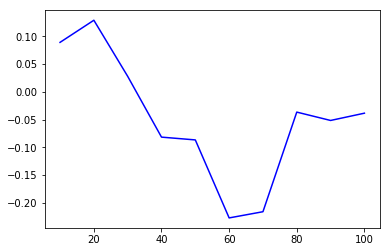

In [12]:
# 绘制不同PCA维数下模型的性能，找到最佳模型／参数（分数最高）
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(Ks, np.array(CH_scores), 'b-')